In [1]:
import numpy as np
from scipy.stats import norm, t

import matplotlib.pyplot as plt

import check_lab01 as p

In [2]:
plt.rcParams.update({'font.size': 18})
plt.rcParams['lines.linewidth'] = 3


# ME 3263                                                             
## Lab #1 -   Measurements of precision and accuracy of smartphone accelerometers                                                            
### How can you measure something?

All measurements have traceable standards. There are seven base units in SI -
meter (length), second (time), Mole (amount of substance), Ampere (electric
current), Kelvin (temperature), Candela (Luminous intensity), and kilogram
(mass)[ [**1**](https://www.nist.gov/pml/weights-and-measures/metric-si/si-units) ]. SI derived units are units of measurement derived from the seven base units. They are either dimensionless or can be expressed as a product of one or more of the base units. Any measurement you make should have some method to check against a reference.

In this lab, we will use different smartphones to measure acceleration due to gravity, g, (m/s$^{2}$). We will perform student's t-test to examine statistical equivalence of two phone measuremnets, and perform analysis to determine accuracy and precision of the measurements. 

### Sources of measurement variations

No measurement is exact. No surface is compeletely flat. Every measurement you
make has two types of uncertainties, *systematic* and *random*. *Systematic*
uncertainties come from faults in your assumptions or equipment.

In theory, all uncertainies could be accounted for by factoring in all physics
in a problem e.g. Temperature-dependence, Coriolis effect, electrical
disturbances in your readings. In practice, the diminishing return on investment
prevents this practice. For something like measuring  acceleration due to gravity,g, it is more than
sufficient to report the average and standard deviation. 

Next, you will determine the probability that two groups of samples--e.g. group
A and group B--have the same average value. This process is called the Student
t-test[ [**2**](https://www.ruf.rice.edu/~bioslabs/tools/stats/ttest.html) ].The variable, 

$t=\frac{|M_A-M_B|}{\sqrt{ab}}$

$a=\frac{N_A+N_B}{N_A N_B}$

$b=\frac{(N_A-1)S_A^2+(N_B-1)S_B^2}{N_A+N_B-2}$

is a function of the two group means, $M_A$
and $M_B$, two group deviations, $S_A$ and $S_B$, and number of samples per
group, $N_1$ and $N_2$. Calculate $t$ for groups A and B by filling in Table 2. 

**Table 2: Determining t for groups A and B**

|Sample | A Length | $(L-M_A)^2$ | B Length | $(L-M_A)^2$|
| --- | --- | --- | --- | --- |
|1 | 
|2 | 
|3 | 
|4 | 
|5 | 
|**sum** |
|$M$ and $S^2$ |$sum/N_A$ | $sum/(N_A-1)$|$sum/N_B$ | $sum/(N_B-1)$


## Example calculations in Python
Let's consider two groups of samples A and B. Sample indicates measuremnts of a bar using caliper. Compare two saple sets A and B using t-statistics 

|group| sample 1|sample 2|sample 3|sample 4|sample 5|
|---  | ---     |  ---   | ---    | ---    | ---    |
|A|104.14 mm | 101.61 mm |  99.06 mm | 102.87 mm | 106.68 mm |
|B|104.12 mm | 101.63 mm |  97.79 mm | 101.58 mm | 104.17 mm |

In [3]:
A=np.array([104.14, 101.61 ,  99.06, 102.87, 106.68])
B=np.array([104.12, 101.63 ,  97.79, 101.58 , 104.17])
meanA=np.sum(A)/len(A)
meanB=np.sum(B)/len(B)
s2A=np.sum((A-meanA)**2)/(len(A)-1)
s2B=np.sum((B-meanB)**2)/(len(B)-1)
a=(len(A)+len(B))/(len(A)*len(B)*1.0)
b=((len(A)-1)*s2A+(len(B)-1)*s2B)/(len(A)+len(B)-2)
#tstat=(meanA-meanB)/np.sqrt(s2A/len(A)+s2B/len(B))
tstat=(meanA-meanB)/np.sqrt(a*b)

print('example groups A and B have t=%1.2f'%tstat)

example groups A and B have t=0.59


In [4]:
df=len(A)+len(B)-2
# Print out the table for df degrees of freedom (N1+N2-2)
print('df=%i'%df )
print('| p=0.05 | p=0.025 | p=0.01 | p=0.005 |')
print('|    --- |     --- |    --- |     --- |')
print("| %1.2f   | %1.2f    | %1.2f   | %1.2f    |"%(t.interval(0.95, df)[1],\
                                                     t.interval(0.975, df)[1],\
                                                     t.interval(0.99, df)[1],\
                                                     t.interval(0.995, df)[1]))

df=8
| p=0.05 | p=0.025 | p=0.01 | p=0.005 |
|    --- |     --- |    --- |     --- |
| 2.31   | 2.75    | 3.36   | 3.83    |


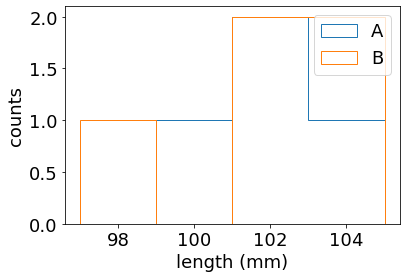

In [5]:
# Example : Plotting histogram

plt.hist(A,np.linspace(97,105,5),histtype='step',label='A')
plt.hist(B,np.linspace(97,105,5),histtype='step',label='B')
plt.xlabel('length (mm)')
plt.ylabel('counts')
plt.legend()

# Problem 1

Groups A and B have different measurements of the mean length. Is it statistically significant?

In [6]:
Answer  = 'maybe' # replace 1 with 'yes' or  0 'no'
p.check_p01(Answer)

Whoops, try again


0

# Problem 2

Compare two groups of samples:

|group| sample 1|sample 2|sample 3|sample 4|sample 5|
|--  | ---     |  ---   | ---    | ---    | ---    |
|A|103.5| 99.0| 104.5| 110.7| 98.4|
|B|108.8| 117.9| 113.8| 107.7| 112.7|

Calculate the t-statistic and the t-value comparing the average of group A and group B. Is there a statisitically significant difference between the two sets of measurements?


In [7]:
A=np.array([103.5, 99.0, 104.5, 110.7, 98.4])
B=np.array([108.8, 117.9, 113.8, 107.7, 112.7])
meanA=np.sum(A)/len(A)
meanB=np.sum(B)/len(B)
s2A=np.sum((A-meanA)**2)/(len(A)-1)
s2B=np.sum((B-meanB)**2)/(len(B)-1)
a=(len(A)+len(B))/(len(A)*len(B)*1.0)
b=((len(A)-1)*s2A+(len(B)-1)*s2B)/(len(A)+len(B)-2)

tstat=(meanB-meanA)/np.sqrt(a*b) # your work here
print('tstat=%i'%tstat )


tstat=3


In [8]:
# Leave this alone, execute to check the answer
degrees_of_freedom = len(A)+len(B)-2
tvar=t.interval(0.95,degrees_of_freedom)[1]
Answer = 'maybe' # = 'yes' or 'no'
p.check_p02(tstat,Answer)

Whoops, try again


0

### Lab 01 Procedure - Measuring gravitational acceleration, g, with smartphones 

Smartphone accelerometers use  [**Micro Electronics Mechanical Systems (MEMS)**](https://www.youtube.com/watch?v=T_iXLNkkjFo&list=LLaKRw5uXV1fO_c_jxFua8MA&index=2&t=184s) to measure the acceleration of the phone. In the current experiment, you will use smartphone to measure acceleration due to gravity. Real-time recording of data gives you multiple measurements of g which are different from exact value of [g at the surface of the Earth](https://physics.nist.gov/cuu/Constants/index.html) is $g=9.80665~ m/s^{2}$.. The difference can be attributed to _systematic_ and _random_ uncertainties. These uncertainties are introduced by factors such as flatness of the surface, environmental vibrations, and other factors.  In this lab exercise, you will collect data for two different smartphones (preferably from different manufacturers) and perform  statistical analysis to compare performance of two phones.

- [Download the phyphox app from appstore : Android/ Appple](https://phyphox.org/download/)

- Scan the QR code for Sensor Statistics experiment
<img src="./figures/sensor_statistics_QRcode.png" alt="Drawing" style="width: 150px;"/>
- Run the timed experiment and export data for Phone 1, say Sample A
- Run the timed experiment and export data for Phone 2, say Sample B

<img src="./figures/android.png" alt="Drawing" style="width: 300px;"/>
<center>Figure 1:  Measurements of g from phone 1, (Sample A)</center>
<img src="./figures/iphone.png" alt="Drawing" style="width: 300px;"/>
<center>Figure 2:  Measurements of g from phone 2, (Sample B)</center>

1. Assume accurate value of [g at the surface of the Earth](https://physics.nist.gov/cgi-bin/cuu/Value?gn|search_for=gravity) is $g=9.80665~ m/s^{2}$. Which phone yeilds more accurate measurements? Which phone is more precise?

2. Choose 30 measurements from each data set for analysis. Explain if the sample of 30 measurements is statistically equivalent to the complete dataset, for both cases.

    You need to perform two individual one-sample t-tests [ [**3**](http://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t) ] for A & B. Assume that the average for all of the measurements is the true mean of the data set. For example, to compare sample mean to population of set A, the t-statistics variable

 $t=\frac{|M_A-\mu_A|*\sqrt{N_A}}{{S_A}}$

    is a function of the mean of the data set, $M_A$ , group standard deviation, $S_A$ , group population mean $\mu_A$ and number of samples in the group, $N_A$=30. 

3. Perform t-test using equal-sized groups from the two data sets. Do the 2 phones provide stastistically equivalent measurements of g? _If there are differences are these __systematic__ or __random__?_ What is the resulting error?

In [ ]:
import pandas as pd

## Importing your data to Jupyter

1. While you're in the Lab_01 folder, click the "Upload" button in the top right.
2. Choose your csv file from your cell phone data collection of your accelerometer
3. Click the blue "Upload" button next to the file. 
4. In this folder, there is an example file called `google.csv`
5. In the next code cell, I load the `google.csv` file into a variable called `data`.
6. The `google.csv` file has a column for each x-, y-, and z-directions, so I'll load just the z-direction to measure $$g$$
7. Finally, I create a histogram of the accelerometer values

In [ ]:
data = pd.read_csv('google.csv')
zacc = data['Acceleration z (m/s^2)'].values

plt.hist(zacc,30)
plt.ylabel('number of measurements')
plt.xlabel('acceleration (m/s/s)');

### Your Report 

Your report should include:

1. Introduction

2. Methods
  
3. Results and Discussion

4. Conclusion



### References
1. [https://www.nist.gov/pml/weights-and-measures/metric-si/si-units](https://www.nist.gov/pml/weights-and-measures/metric-si/si-units)

2. [Student
t-test](https://www.ruf.rice.edu/~bioslabs/tools/stats/ttest.html)

3. [One-sample Student's
t-test](http://sites.utexas.edu/sos/guided/inferential/numeric/claim/one-sample-t/)

4. [Layer, H. P. Length—Evolution from Measurement Standard to a Fundamental Constant](./museum-length.pdf)

5. [Uncertainty
Notes](https://courses.washington.edu/phys431/uncertainty_notes.pdf)

6. [A guide to smartphone sensors](https://spacemath.gsfc.nasa.gov/Sensor/SensorsBook.pdf)

7. g at the surface of the earth,  https://physics.nist.gov/cgi-bin/cuu/Value?gn|search_for=gravity (copy-paste the link in browser if click does not work ]
